# IMPORTING

In [48]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
%store -r data

# TRAIN-TEST SPLIT

In [50]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

13832 train + 3458 test


# PREPARE DATA FOR MACHINE LEARNING

In [51]:
x_train = train_set.drop('price', axis=1)
y_train = train_set['price'].copy()

# LINEAR REGRESSION

In [52]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
def array_to_dict(labels,coeffs):
    '''
    This function takes two arrays as arguments and turns those 
    arrays into a dictionary so that it is easier to interpret the 
    coefficients from the sklearn analysis
    '''
    one_list = list(labels)
    two_list = list(coeffs)
    res = {} 
    for key in two_list: 
        for name in one_list: 
            res[key] = name 
            one_list.remove(name) 
            break 
    return res

In [54]:
coefficients = lr.coef_
variables = np.array(data.columns)

array_to_dict(coefficients, variables)

{'price': -40532.39805548973,
 'bedrooms': 43733.39256104727,
 'bathrooms': 117.02823841448266,
 'sqft_living': 0.1175515282433685,
 'sqft_lot': 5524.626549557242,
 'floors': 584279.8482121091,
 'waterfront': 51719.50229293643,
 'view': 29627.090125143266,
 'condition': 94624.96829098869,
 'grade': 75.4011551493713,
 'sqft_above': 41.6270834632245,
 'sqft_basement': -2657.6547637091394,
 'yr_built': 18.330015971488763,
 'yr_renovated': -571.5825126296768,
 'zipcode': 603586.0177528661,
 'lat': -218985.54834240835,
 'long': 19.040807195570434,
 'sqft_living15': -0.359420627648098,
 'sqft_lot15': 39564.30377287694,
 'date_year': 1555.8902225485729,
 'date_month': -257.7889745581585}

In [55]:
lr.intercept_

-74567005.55371456

In [56]:
y_pred = lr.predict(x_train)

In [57]:
lr.score(x_train, y_train)

0.6994001754468648

## RMSE

In [58]:
lr_rsme = mean_squared_error(y_train, y_pred)
lr_rmse = np.sqrt(lr_rsme)

In [59]:
rmse_dollars = '${:,.2f}'.format(lr_rmse)
rmse_dollars

'$205,814.25'

# EVALUATING MODEL

In [62]:
x2 = sm.add_constant(x_train)

model = sm.OLS(y_train, x2)

/Users/MichaelWirtz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [63]:
est = model.fit()

### Normally Distributed Residuals

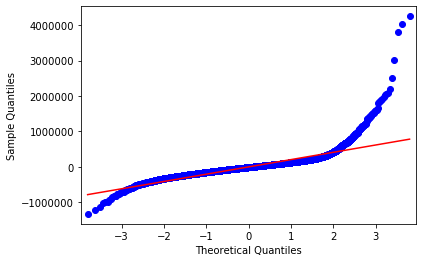

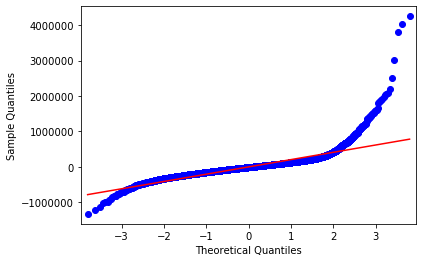

In [73]:
sm.qqplot(est.resid, line = 's')

In [74]:
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

9.771519421506618e-07

### Confidence Intervals

In [79]:
est.conf_int()

,0,1
const,-9.962705e+07,-4.950696e+07
bedrooms,-4.540386e+04,-3.566094e+04
bathrooms,3.559884e+04,5.186794e+04
sqft_living,1.113849e+02,1.226909e+02
sqft_lot,3.258530e-03,2.318445e-01
floors,-3.492063e+03,1.454132e+04
waterfront,5.423429e+05,6.262168e+05
view,4.648568e+04,5.695332e+04
condition,2.374100e+04,3.551318e+04
grade,8.922796e+04,1.000220e+05


### Summary

In [80]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     1607.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:28:08   Log-Likelihood:            -1.8886e+05
No. Observations:               13832   AIC:                         3.778e+05
Df Residuals:                   13811   BIC:                         3.779e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.457e+07   1.28e+07     -5.832      0.000   -9.96e+07   -4.95e+07
bedrooms      -4.053e+04   2485.267    -16.309      0.000   -4.54e+04   -3.57e+04
bathrooms      4.373e+04   4149.994     10.538      0.000    3.56e+04    5.19e+04
sqft_living     117.0379      2.884     40.582      0.000     111.385     122.691
sqft_lot          0.1176      0.058      2.016      0.044       0.003       0.232
floors         5524.6265   4600.033      1.201      0.230   -3492.063    1.45e+04
waterfront     5.843e+05   2.14e+04     27.309      0.000    5.42e+05    6.26e+05
view           5.172e+04   2670.132     19.370      0.000    4.65e+04     5.7e+04
condition      2.963e+04   3002.899      9.866      0.000    2.37e+04    3.55e+04
grade          9.462e+04   2753.387     34.367      0.000    8.92e+04       1e+05
sqft_above       75.3915      2.890     26.091      0.000      69.728      81.055
sqft_basement    41.6174      3.360     12.388      0.000      35.032      48.203
yr_built      -2657.6548     92.602    -28.700      0.000   -2839.168   -2476.142
yr_renovated     18.3300      4.686      3.912      0.000       9.145      27.515
zipcode        -571.5825     42.005    -13.607      0.000    -653.918    -489.247
lat            6.036e+05   1.37e+04     43.988      0.000    5.77e+05     6.3e+05
long           -2.19e+05   1.68e+04    -13.021      0.000   -2.52e+05   -1.86e+05
sqft_living15    19.0408      4.408      4.319      0.000      10.400      27.682
sqft_lot15       -0.3594      0.090     -3.992      0.000      -0.536      -0.183
date_year      3.956e+04   6049.528      6.540      0.000    2.77e+04    5.14e+04
date_month     1555.8902    906.936      1.716      0.086    -221.827    3333.608
date_day       -257.7890    204.982     -1.258      0.209    -659.581     144.004
==============================================================================
Omnibus:                    12328.943   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1468889.198
Skew:                           3.797   Prob(JB):                         0.00
Kurtosis:                      52.910   Cond. No.                     5.29e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.01e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""